Base de datos cargada correctamente.

Entrenando el modelo...
Entrenamiento completado.

--- Resultados del Modelo de Red Neuronal (conjunto de prueba) ---
Eficacia (Accuracy): 0.8577
Precisión (Precision): 0.8467
Score: 0.8577

--- Reporte de Clasificación ---
                 precision    recall  f1-score   support

     Derivación       0.65      0.45      0.53      2428
      Domicilio       0.90      0.95      0.92     14076
Hospitalización       0.66      0.64      0.65      1404

       accuracy                           0.86     17908
      macro avg       0.74      0.68      0.70     17908
   weighted avg       0.85      0.86      0.85     17908


--- Matriz de Confusión (conjunto de prueba) ---
[[ 1096  1145   187]
 [  443 13362   271]
 [  148   355   901]]


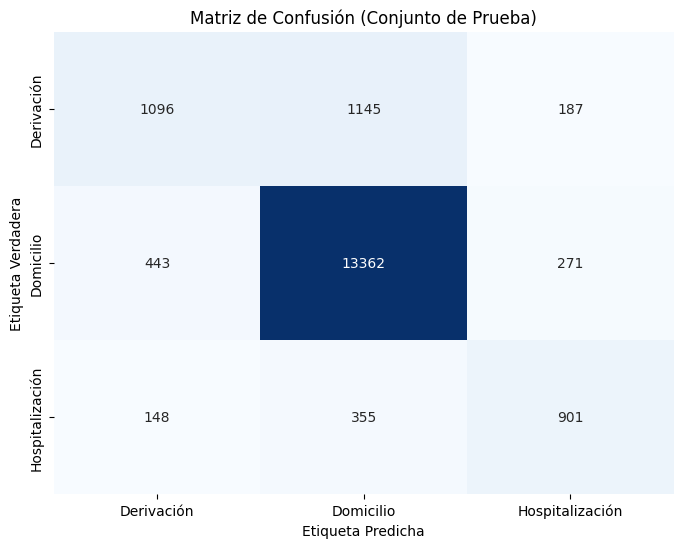


--- Matriz de Confusión (Conjunto de Datos Completo) ---
[[ 5938  5032   727]
 [ 1798 67787  1195]
 [  568  1436  5056]]


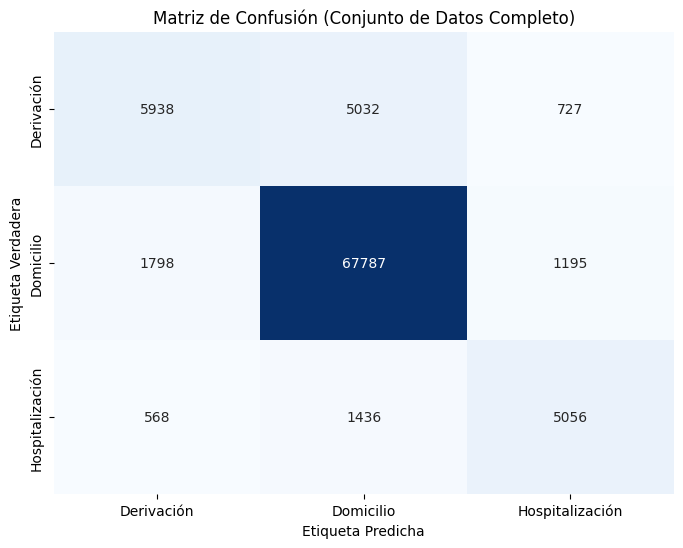

In [1]:
# ======================================================================
# Sección 1: Importación de Bibliotecas
# ======================================================================
# pandas es para el manejo y manipulación de datos en DataFrames.
# train_test_split de sklearn.model_selection es para dividir los datos en conjuntos de entrenamiento y prueba.
# StandardScaler de sklearn.preprocessing es para normalizar las variables numéricas.
# LabelEncoder de sklearn.preprocessing es para codificar la variable objetivo (Destino).
# MLPClassifier de sklearn.neural_network es la clase para la Red Neuronal (Perceptrón Multicapa).
# accuracy_score, precision_score, y confusion_matrix de sklearn.metrics son para evaluar el modelo.
# matplotlib.pyplot se usa para generar gráficos, como la matriz de confusión.
# seaborn se usa para crear un mapa de calor visual de la matriz de confusión.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# Sección 2: Carga de Datos y Preprocesamiento
# ======================================================================

# Cargar la base de datos desde el archivo CSV.
# Asegúrate de que el archivo 'basedatos_202507161527.csv' esté en el mismo directorio que este script.
try:
    df = pd.read_csv('databases/basedatos_202507161527.csv')
    print("Base de datos cargada correctamente.")
except FileNotFoundError:
    print("Error: El archivo 'basedatos_202507161527.csv' no fue encontrado.")
    exit()

# Separar las características (variables independientes) y la variable objetivo (variable dependiente).
# X contendrá todas las columnas excepto 'Destino'.
# y contendrá solo la columna 'Destino'.
X = df.drop('Destino', axis=1)
y = df['Destino']

# Identificar las columnas numéricas y categóricas para su posterior procesamiento.
columnas_numericas = ['Temperatura', 'Pulso', 'PAS', 'PAD', 'SatO2', 'Edad']
columnas_categoricas = ['Sexo', 'Triage', 'Temperatura_cat', 'Pulso_cat', 'PAS_cat', 'PAD_cat', 'SatO2_cat', 'Edad_cat']

# Codificar las variables categóricas utilizando One-Hot Encoding.
# Esto convierte las categorías en columnas binarias (0 o 1).
# 'drop_first=True' evita la multicolinealidad.
X_categoricas = pd.get_dummies(X[columnas_categoricas], drop_first=True)

# Unir las variables numéricas con las variables categóricas ya codificadas.
X_final = pd.concat([X[columnas_numericas], X_categoricas], axis=1)

# Codificar la variable objetivo 'Destino' para que sea numérica.
# Por ejemplo, 'Domicilio' -> 0, 'Hospitalización' -> 1.
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

# ======================================================================
# Sección 3: Normalización y División de Datos
# ======================================================================

# Normalizar las características numéricas utilizando StandardScaler.
# Esto es esencial para las redes neuronales ya que les ayuda a converger más rápido.
# Crea una instancia del escalador.
scaler = StandardScaler()
# Ajusta y transforma los datos numéricos de X_final.
X_final[columnas_numericas] = scaler.fit_transform(X_final[columnas_numericas])

# Dividir los datos en conjuntos de entrenamiento y prueba.
# 80% de los datos para entrenar el modelo (X_train, y_train).
# 20% de los datos para evaluar el modelo (X_test, y_test).
# 'random_state=42' asegura que la división sea la misma cada vez que se ejecute el código.
X_train, X_test, y_train, y_test = train_test_split(X_final, y_encoded, test_size=0.2, random_state=42)

# ======================================================================
# Sección 4: Entrenamiento del Modelo de Red Neuronal
# ======================================================================

# Crear una instancia del clasificador de Perceptrón Multicapa (MLPClassifier).
# hidden_layer_sizes=(50, 50) define una red con 2 capas ocultas, cada una con 50 neuronas.
# max_iter=500 establece el número máximo de iteraciones para el entrenamiento.
# activation='relu' es la función de activación, ideal para redes profundas.
# solver='adam' es el optimizador que se utilizará para el entrenamiento.
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, activation='relu', solver='adam', random_state=42)

# Entrenar el modelo con los datos de entrenamiento.
print("\nEntrenando el modelo...")
mlp.fit(X_train, y_train)
print("Entrenamiento completado.")

# ======================================================================
# Sección 5: Evaluación del Modelo y Resultados
# ======================================================================

# Predecir las etiquetas para los datos de prueba.
y_pred = mlp.predict(X_test)

# Calcular y mostrar las métricas de rendimiento.
# La precisión general del modelo.
accuracy = accuracy_score(y_test, y_pred)
# La precisión de las predicciones, promediada para todas las clases.
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
# El score es otra medida de precisión del modelo.
score = mlp.score(X_test, y_test)

print("\n--- Resultados del Modelo de Red Neuronal (conjunto de prueba) ---")
print(f"Eficacia (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Score: {score:.4f}")

# Mostrar el reporte de clasificación detallado con precision, recall y f1-score.
print("\n--- Reporte de Clasificación ---")
# Recuperar los nombres de las clases originales para el reporte.
print(classification_report(y_test, y_pred, target_names=label_encoder_y.classes_, zero_division=0))

# Calcular la matriz de confusión para el conjunto de prueba
conf_matrix_test = confusion_matrix(y_test, y_pred)
print("\n--- Matriz de Confusión (conjunto de prueba) ---")
print(conf_matrix_test)

# ======================================================================
# Sección 6: Visualización de Matriz de Confusión
# ======================================================================

def plot_confusion_matrix(cm, classes, title='Matriz de Confusión', cmap=plt.cm.Blues):
    """
    Esta función imprime y dibuja la matriz de confusión.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.show()

# Visualizar la matriz de confusión del conjunto de prueba
plot_confusion_matrix(conf_matrix_test, classes=label_encoder_y.classes_, title='Matriz de Confusión (Conjunto de Prueba)')

# ======================================================================
# Sección 7: Cálculo de Matriz de Confusión para el Conjunto de Datos Completo
# ======================================================================

# Predecir las etiquetas para el conjunto de datos completo
y_pred_full = mlp.predict(X_final)

# Calcular y mostrar la matriz de confusión para todo el conjunto de datos
conf_matrix_full = confusion_matrix(y_encoded, y_pred_full)

print("\n--- Matriz de Confusión (Conjunto de Datos Completo) ---")
print(conf_matrix_full)

# Visualizar la matriz de confusión del conjunto de datos completo
plot_confusion_matrix(conf_matrix_full, classes=label_encoder_y.classes_, title='Matriz de Confusión (Conjunto de Datos Completo)')


Base de datos cargada correctamente.

Entrenando el modelo...
Entrenamiento completado.

--- Resultados del Modelo de Red Neuronal (Conjunto de Prueba) ---
Eficacia (Accuracy): 0.8484
Precisión (Precision): 0.8314
Score: 0.8484

--- Reporte de Clasificación (Conjunto de Prueba) ---
                 precision    recall  f1-score   support

     Derivación       0.62      0.37      0.46      2428
      Domicilio       0.89      0.96      0.92     14076
Hospitalización       0.63      0.56      0.59      1404

       accuracy                           0.85     17908
      macro avg       0.71      0.63      0.66     17908
   weighted avg       0.83      0.85      0.83     17908


--- Matriz de Confusión (Valores) con el Conjunto de Datos Completo ---
[[ 4717  5926  1054]
 [ 1536 68213  1031]
 [  786  1953  4321]]


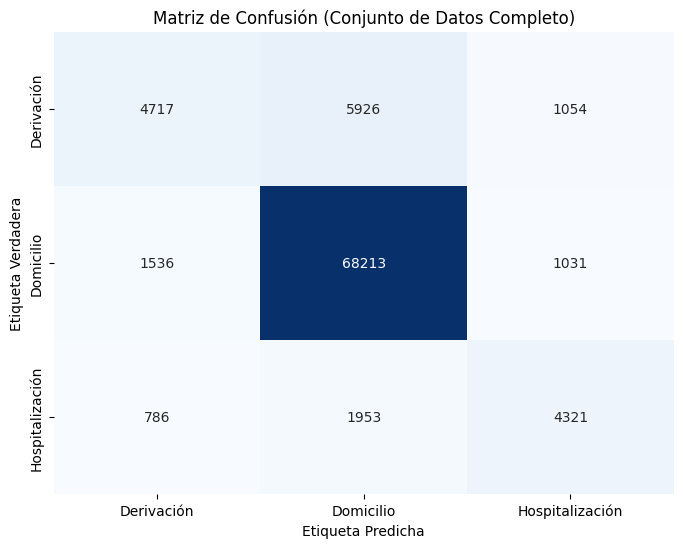

In [3]:
# ======================================================================
# Sección 1: Importación de Bibliotecas
# ======================================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# Sección 2: Carga de Datos y Preprocesamiento
# ======================================================================
try:
    df = pd.read_csv('databases/basedatos_202507161527.csv')
    print("Base de datos cargada correctamente.")
except FileNotFoundError:
    print("Error: El archivo 'basedatos_202507161527.csv' no fue encontrado.")
    exit()

# Definir las variables a usar en este modelo
columnas_numericas = ['Temperatura', 'Pulso', 'PAS', 'PAD', 'SatO2', 'Edad']
columnas_categoricas = ['Sexo', 'Triage']
variable_objetivo = 'Destino'

# Separar las características (X) y la variable objetivo (y)
X = df[columnas_numericas + columnas_categoricas]
y = df[variable_objetivo]

# Codificar las variables categóricas de entrada
X_categoricas_encoded = pd.get_dummies(X[columnas_categoricas], drop_first=True)

# Combinar las variables numéricas y categóricas codificadas
X_final = pd.concat([X[columnas_numericas], X_categoricas_encoded], axis=1)

# Codificar la variable objetivo 'Destino'
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

# ======================================================================
# Sección 3: Normalización y División de Datos
# ======================================================================
scaler = StandardScaler()
X_final[columnas_numericas] = scaler.fit_transform(X_final[columnas_numericas])

X_train, X_test, y_train, y_test = train_test_split(X_final, y_encoded, test_size=0.2, random_state=42)

# ======================================================================
# Sección 4: Entrenamiento del Modelo de Red Neuronal
# ======================================================================
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, activation='relu', solver='adam', random_state=42)
print("\nEntrenando el modelo...")
mlp.fit(X_train, y_train)
print("Entrenamiento completado.")

# ======================================================================
# Sección 5: Evaluación del Modelo y Matriz de Confusión
# ======================================================================
# Definir la función para visualizar la matriz de confusión
def plot_confusion_matrix(cm, classes, title='Matriz de Confusión', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.show()

# Predecir sobre el conjunto de datos completo
y_pred_full = mlp.predict(X_final)
conf_matrix_full = confusion_matrix(y_encoded, y_pred_full)

# Calcular y mostrar métricas de rendimiento con el conjunto de prueba
y_pred_test = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
score = mlp.score(X_test, y_test)

print("\n--- Resultados del Modelo de Red Neuronal (Conjunto de Prueba) ---")
print(f"Eficacia (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Score: {score:.4f}")

# Mostrar el reporte de clasificación para el conjunto de prueba
print("\n--- Reporte de Clasificación (Conjunto de Prueba) ---")
print(classification_report(y_test, y_pred_test, target_names=label_encoder_y.classes_, zero_division=0))

print("\n--- Matriz de Confusión (Valores) con el Conjunto de Datos Completo ---")
print(conf_matrix_full)

# Visualizar la matriz de confusión con el conjunto de datos completo
plot_confusion_matrix(conf_matrix_full, classes=label_encoder_y.classes_, title='Matriz de Confusión (Conjunto de Datos Completo)')


Base de datos cargada correctamente.

Entrenando el modelo...
Entrenamiento completado.

--- Resultados del Modelo de Red Neuronal ---
Eficacia (Accuracy): 0.8368
Precisión (Precision): 0.8161
Score: 0.8368

--- Reporte de Clasificación (Conjunto de Prueba) ---
                 precision    recall  f1-score   support

     Derivación       0.53      0.38      0.44      2428
      Domicilio       0.89      0.96      0.92     14076
Hospitalización       0.58      0.42      0.49      1404

       accuracy                           0.84     17908
      macro avg       0.67      0.58      0.62     17908
   weighted avg       0.82      0.84      0.82     17908


--- Matriz de Confusión (Valores) con el Conjunto de Datos Completo ---
[[ 4603  5963  1131]
 [ 1964 67876   940]
 [ 1859  1923  3278]]


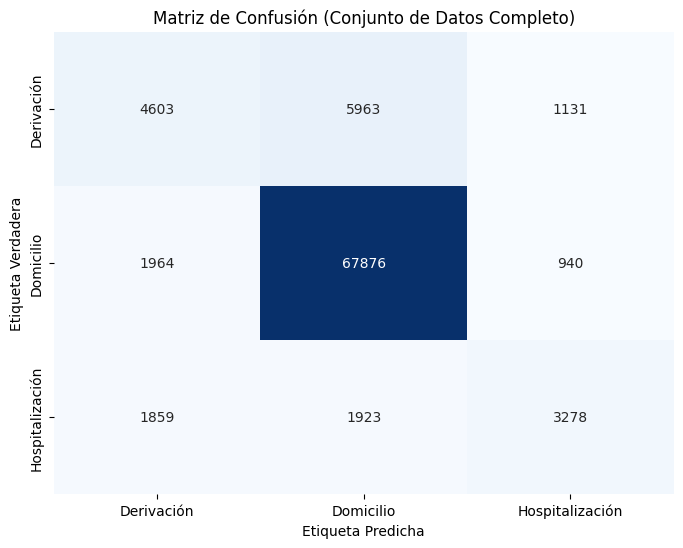

In [5]:
# ======================================================================
# Sección 1: Importación de Bibliotecas
# ======================================================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ======================================================================
# Sección 2: Carga de Datos y Preprocesamiento
# ======================================================================
try:
    df = pd.read_csv('databases/basedatos_202507161527.csv')
    print("Base de datos cargada correctamente.")
except FileNotFoundError:
    print("Error: El archivo 'basedatos_202507161527.csv' no fue encontrado.")
    exit()

# Definir las variables a usar en este modelo
columnas_categoricas = ['Sexo', 'Triage', 'Temperatura_cat', 'Pulso_cat', 'PAS_cat', 'PAD_cat', 'SatO2_cat', 'Edad_cat']
variable_objetivo = 'Destino'

# Separar las características (X) y la variable objetivo (y)
X = df[columnas_categoricas]
y = df[variable_objetivo]

# Codificar las variables categóricas de entrada
X_final = pd.get_dummies(X, drop_first=True)

# Codificar la variable objetivo 'Destino'
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y)

# ======================================================================
# Sección 3: División de Datos
# ======================================================================
# No se requiere normalización para este modelo, ya que todas las variables son categóricas
X_train, X_test, y_train, y_test = train_test_split(X_final, y_encoded, test_size=0.2, random_state=42)

# ======================================================================
# Sección 4: Entrenamiento del Modelo de Red Neuronal
# ======================================================================
mlp = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=500, activation='relu', solver='adam', random_state=42)
print("\nEntrenando el modelo...")
mlp.fit(X_train, y_train)
print("Entrenamiento completado.")

# ======================================================================
# Sección 5: Evaluación del Modelo y Matriz de Confusión
# ======================================================================
# Definir la función para visualizar la matriz de confusión
def plot_confusion_matrix(cm, classes, title='Matriz de Confusión', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.show()

# Predecir sobre el conjunto de datos completo
y_pred_full = mlp.predict(X_final)
conf_matrix_full = confusion_matrix(y_encoded, y_pred_full)

# Calcular y mostrar métricas de rendimiento con el conjunto de prueba
y_pred_test = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted', zero_division=0)
score = mlp.score(X_test, y_test)

print("\n--- Resultados del Modelo de Red Neuronal ---")
print(f"Eficacia (Accuracy): {accuracy:.4f}")
print(f"Precisión (Precision): {precision:.4f}")
print(f"Score: {score:.4f}")

# Mostrar el reporte de clasificación para el conjunto de prueba
print("\n--- Reporte de Clasificación (Conjunto de Prueba) ---")
print(classification_report(y_test, y_pred_test, target_names=label_encoder_y.classes_, zero_division=0))

print("\n--- Matriz de Confusión (Valores) con el Conjunto de Datos Completo ---")
print(conf_matrix_full)

# Visualizar la matriz de confusión con el conjunto de datos completo
plot_confusion_matrix(conf_matrix_full, classes=label_encoder_y.classes_, title='Matriz de Confusión (Conjunto de Datos Completo)')
